<a href="https://colab.research.google.com/github/vinhpeters/tf-exam/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to regression 

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.11.0


## Get some data

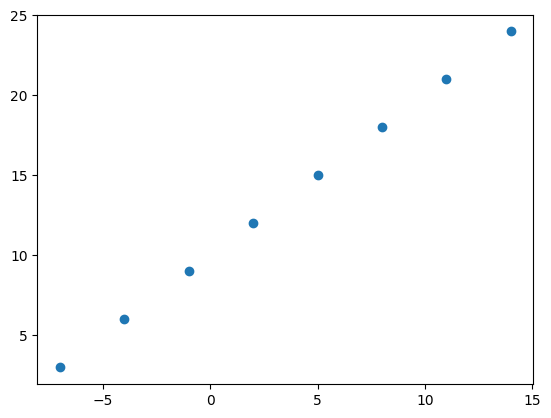

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])
plt.scatter(X,y)

In [5]:
X +10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

## Input and output shapes

In [6]:
# Demo tensor
house_info= tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

In [7]:
input_shape = X[0].shape

In [8]:
output_shape = y[0].shape

In [9]:
input_shape, output_shape

((), ())

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
X[0].ndim

0

In [12]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
X[0].shape

TensorShape([])

## Steps in modelling with Tensorflow

In [14]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))


In [15]:
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [16]:
model.fit(tf.expand_dims(X,axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 19.7525 - mae: 19.7525
Epoch 2/5
1/1 [==============================] - 0s 39ms/step - loss: 19.4712 - mae: 19.4712
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 19.1900 - mae: 19.1900
Epoch 4/5
1/1 [==============================] - 0s 45ms/step - loss: 18.9087 - mae: 18.9087
Epoch 5/5
1/1 [==============================] - 0s 61ms/step - loss: 18.6275 - mae: 18.6275


In [17]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 440ms/step


array([[-18.174753]], dtype=float32)

 ## Improving the model

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [19]:
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [20]:
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 10.0783 - mae: 10.0783
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9458 - mae: 9.9458
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 9.8133 - mae: 9.8133
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6808 - mae: 9.6808
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5483 - mae: 9.5483
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 9.4158 - mae: 9.4158
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 9.2833 - mae: 9.2833
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 9.1508 - mae: 9.1508
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 9.0183 - mae: 9.0183
Epoch 10/100
1/1 [==============================] - 0s 62ms/step - loss: 8.8858 - mae: 8.8858
Epoch 11/100
1/1 [==============================] - 0s 20ms/step - lo

In [21]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 187ms/step


array([[29.917389]], dtype=float32)

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.2), metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.9380 - mae: 14.9380
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 14.0380 - mae: 14.0380
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 13.1381 - mae: 13.1381
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.2381 - mae: 12.2381
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.3381 - mae: 11.3381
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 10.4381 - mae: 10.4381
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 9.5381 - mae: 9.5381
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6381 - mae: 8.6381
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7381 - mae: 7.7381
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 6.8381 - mae: 6.8381
Epoch 11/100
1/1 [==============================] - 0s 36ms/

In [24]:
model.predict([17.0])

1/1 [==============================] - 0s 357ms/step


array([[26.780905]], dtype=float32)

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation=None))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.6486 - mae: 12.6486
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.9311 - mae: 11.9311
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 11.2055 - mae: 11.2055
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.4691 - mae: 10.4691
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 9.7188 - mae: 9.7188
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 8.9516 - mae: 8.9516
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 8.1643 - mae: 8.1643
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.3542 - mae: 7.3542
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8352 - mae: 6.8352
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 7.0389 - mae: 7.0389
Epoch 11/100
1/1 [==============================] - 0s 19ms/ste

In [26]:
model.predict([17.0])

1/1 [==============================] - 0s 200ms/step


array([[27.25321]], dtype=float32)

In [27]:
X = tf.range(-100,100,4)
y = X+10

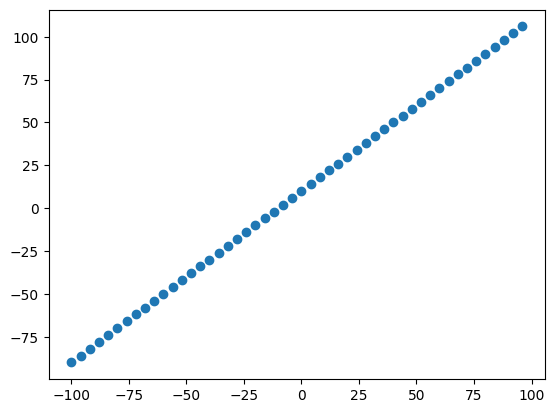

In [28]:
plt.scatter(X,y)

In [29]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]




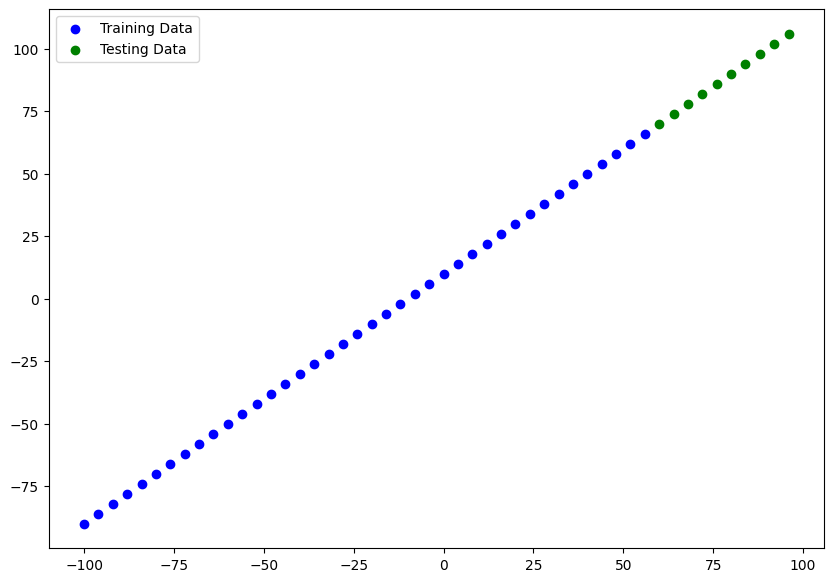

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c='b', label ='Training Data')
plt.scatter(X_test,y_test, c='g', label ='Testing Data')
plt.legend();

In [54]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
tf.keras.layers.Dense(10, input_shape=[1], name='input'),
tf.keras.layers.Dense(1, name='output')
    
], name= 'linear')

model.compile(loss='mae', optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [55]:
model.summary()

Model: "linear"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                20        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100, verbose=0)

In [52]:
from tensorflow.keras.utils import plot_model

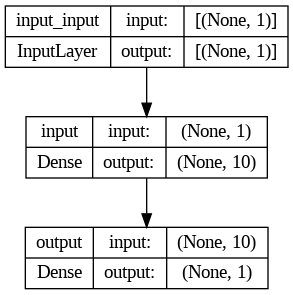

In [56]:
plot_model(model,show_shapes=True)